
--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit
Rotating around fixed point: (5.0, 5.0)


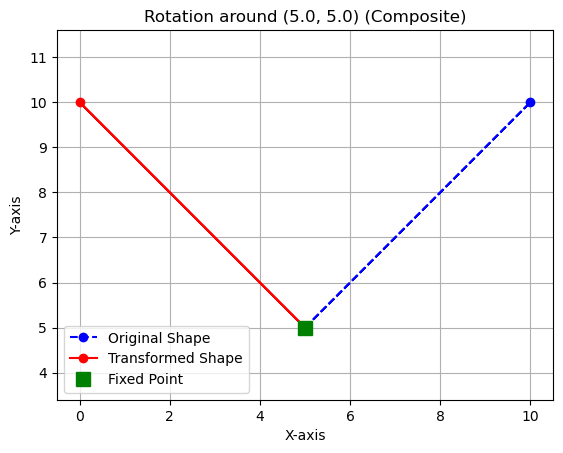


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit


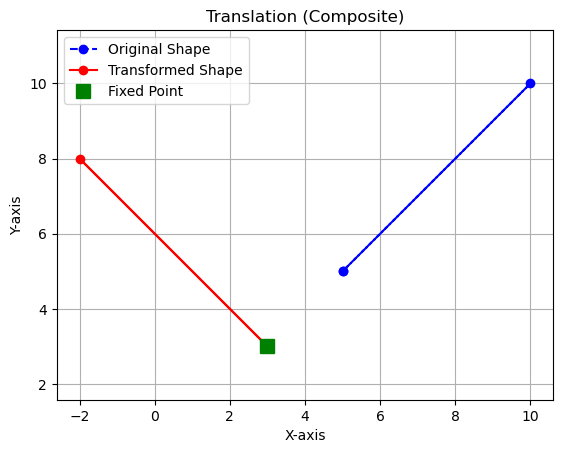


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit
Invalid axis.


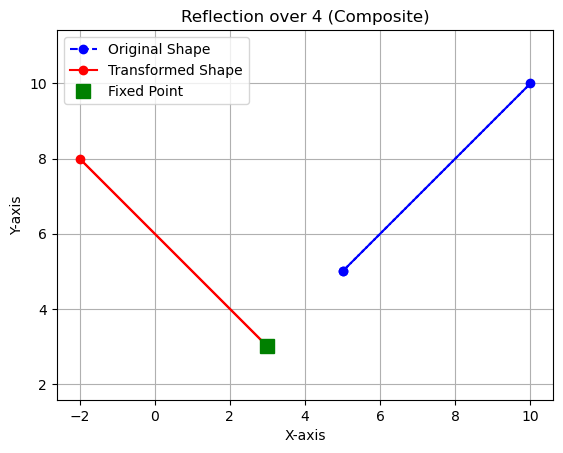


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit


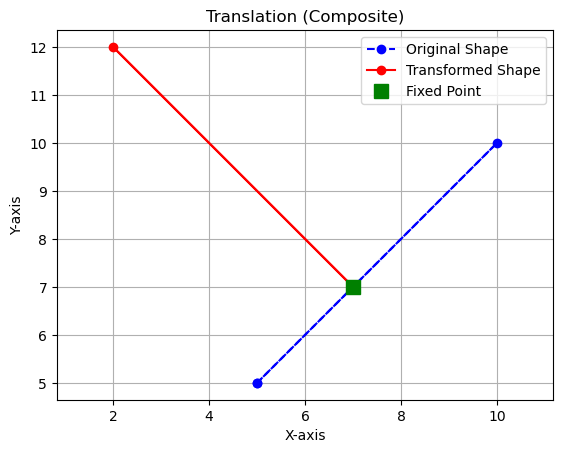


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit
Invalid choice. Please try again.

--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit
Invalid choice. Please try again.

--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit


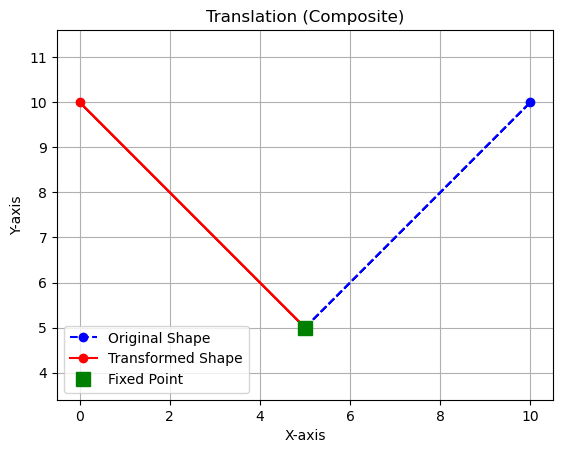


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit
Rotating around fixed point: (5.0, 5.0)


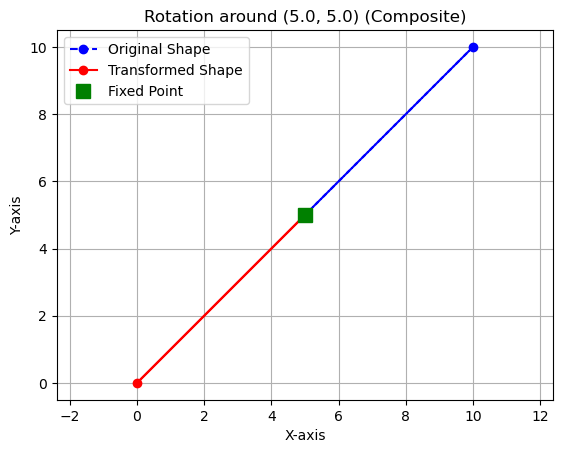


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit
Rotating around fixed point: (5.0, 5.0)


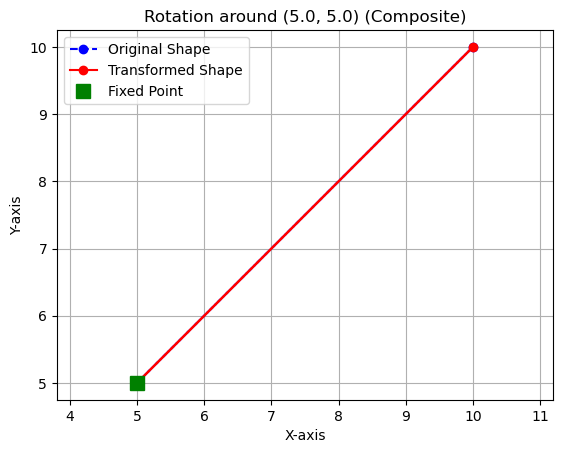


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit


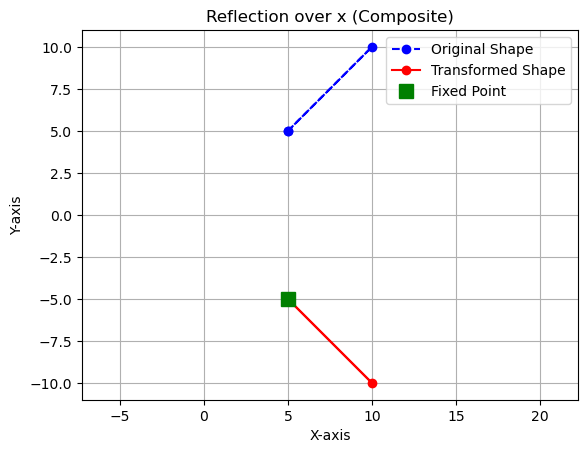


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit


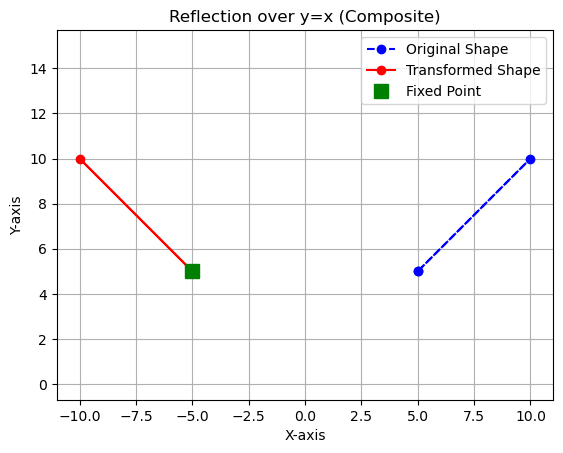


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit
Shape reset to original.


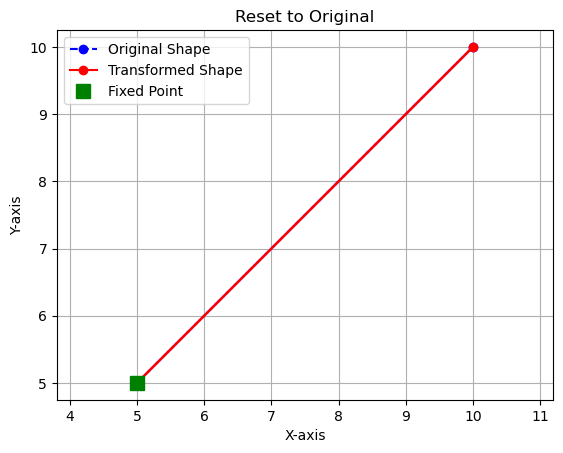


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit


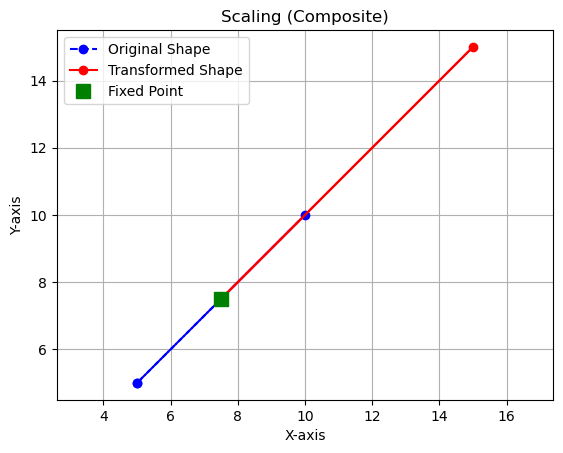


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit


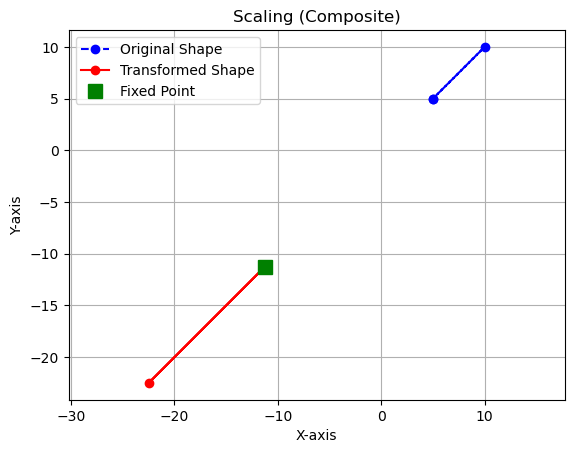


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit
Shape reset to original.


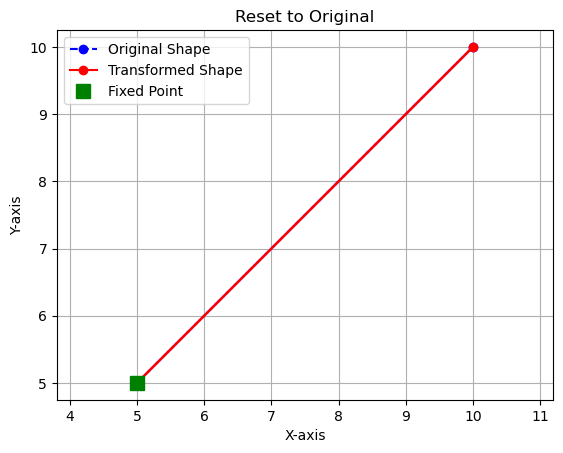


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit


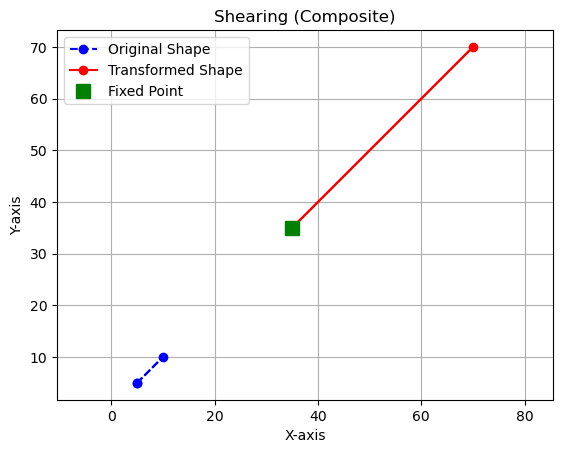


--- Menu ---
1. Translation
2. Scaling
3. Rotation (Fixed first point)
4. Reflection
5. Shearing
6. Reset to Original
7. Exit
Exiting program.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Function to draw the original and current shapes
def draw_shape(original, transformed, title="Transformation"):
    plt.figure()
    plt.plot(original[:, 0], original[:, 1], 'bo--', label='Original Shape')
    plt.plot(transformed[:, 0], transformed[:, 1], 'ro-', label='Transformed Shape')
    
    # Highlight the fixed point (first point)
    plt.plot([transformed[0, 0]], [transformed[0, 1]], 'gs', markersize=8, label='Fixed Point')
    
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()

# Transformation functions
def translate(shape, tx, ty):
    return shape + np.array([tx, ty])

def scale(shape, sx, sy):
    return shape @ np.array([[sx, 0], [0, sy]])

def rotate_about_point(shape, angle_deg, center):
    cx, cy = center
    angle_rad = math.radians(-angle_deg)  # ← Fix here

    rot_mat = np.array([
        [math.cos(angle_rad), -math.sin(angle_rad)],
        [math.sin(angle_rad),  math.cos(angle_rad)]
    ])

    translated = shape - np.array([cx, cy])
    rotated = translated @ rot_mat
    return rotated + np.array([cx, cy])


def reflect(shape, axis='x'):
    if axis == 'x':
        ref_mat = np.array([[1, 0], [0, -1]])
    elif axis == 'y':
        ref_mat = np.array([[-1, 0], [0, 1]])
    elif axis == 'origin':
        ref_mat = np.array([[-1, 0], [0, -1]])
    elif axis == 'y=x':
        ref_mat = np.array([[0, 1], [1, 0]])
    else:
        print("Invalid axis.")
        return shape
    return shape @ ref_mat

def shear(shape, shx=0, shy=0):
    shear_mat = np.array([[1, shx], [shy, 1]])
    return shape @ shear_mat

# Function to take user input for shape
def get_shape_from_user():
    n = int(input("Enter number of vertices: "))
    coords = []
    for i in range(n):
        x = float(input(f"Enter x{i+1}: "))
        y = float(input(f"Enter y{i+1}: "))
        coords.append([x, y])
    coords.append(coords[0])  # Close the shape
    return np.array(coords)

# Main menu
def menu():
    original_shape = get_shape_from_user()
    current_shape = original_shape.copy()

    while True:
        print("\n--- Menu ---")
        print("1. Translation")
        print("2. Scaling")
        print("3. Rotation (Fixed first point)")
        print("4. Reflection")
        print("5. Shearing")
        print("6. Reset to Original")
        print("7. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            tx = float(input("Enter tx: "))
            ty = float(input("Enter ty: "))
            current_shape = translate(current_shape, tx, ty)
            draw_shape(original_shape, current_shape, "Translation (Composite)")

        elif choice == '2':
            sx = float(input("Enter sx: "))
            sy = float(input("Enter sy: "))
            current_shape = scale(current_shape, sx, sy)
            draw_shape(original_shape, current_shape, "Scaling (Composite)")

        elif choice == '3':
            angle = float(input("Enter rotation angle (degrees): "))
            fixed_point = tuple(current_shape[0])  # First point remains fixed
            print(f"Rotating around fixed point: {fixed_point}")
            current_shape = rotate_about_point(current_shape, angle, fixed_point)
            draw_shape(original_shape, current_shape, f"Rotation around {fixed_point} (Composite)")

        elif choice == '4':
            axis = input("Reflect over (x / y / origin / y=x): ").lower()
            current_shape = reflect(current_shape, axis)
            draw_shape(original_shape, current_shape, f"Reflection over {axis} (Composite)")

        elif choice == '5':
            shx = float(input("Enter shear in X (shx): "))
            shy = float(input("Enter shear in Y (shy): "))
            current_shape = shear(current_shape, shx, shy)
            draw_shape(original_shape, current_shape, "Shearing (Composite)")

        elif choice == '6':
            current_shape = original_shape.copy()
            print("Shape reset to original.")
            draw_shape(original_shape, current_shape, "Reset to Original")

        elif choice == '7':
            print("Exiting program.")
            break

        else:
            print("Invalid choice. Please try again.")

# Run the program
menu()
